In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# This dataset contains "Karenia brevis" data from Texas, Mississippi, Alabama, and Florida, 
# as well as data along the Florida Shelf in the Gulf of Mexico and 
# along the eastern coast of Florida in the North Atlantic Ocean.
# Karenia brevis is a harmful algae species

alge_growth = pd.read_csv('habsos_20220225.csv')
        
alge_growth.head(100)

<ipython-input-3-68b8ca6dbc4d>:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  alge_growth = pd.read_csv('habsos_20220225.csv')


,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,...,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA,OBJECTID
0,AL,Orange Beach Waterfront,30.29480,-87.57510,11-JAN-22 05.23.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,12.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939786
1,AL,Bear Point,30.30880,-87.52680,11-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,13.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939785
2,AL,Alabama Point,30.27694,-87.54167,10-JAN-22 05.43.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939778
3,AL,Florida Point A,30.26620,-87.55010,10-JAN-22 05.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,14.9,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939775
4,AL,Cotton Bayou,30.26940,-87.58200,10-JAN-22 05.07.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,16.1,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,939780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AL,Alabama Point,30.27694,-87.54167,01-SEP-21 04.38.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.8,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679555
96,AL,Florida Point A,30.26620,-87.55010,01-SEP-21 04.24.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,28.5,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679556
97,AL,Cotton Bayou,30.26940,-87.58200,01-SEP-21 03.58.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.6,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679557
98,AL,Gulf State Park Pavilion,30.25472,-87.64333,01-SEP-21 03.35.00.000000000 PM,NaN,Karenia,brevis,not observed,0,...,29.3,deg. C,1.0,NaN,NaN,9,NaN,NaN,9,679559


Data sources:

https://www.ncei.noaa.gov/maps/habsos/maps.htm


In [4]:
# original data size
print(alge_growth.shape)

(190339, 25)


In [15]:
#cleaning data

alge_growth_clean = alge_growth.drop(columns=['WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA'])

# obtaining relavent information from database
alge_growth_clean = alge_growth_clean[alge_growth_clean['CELLCOUNT'] >= 10000] 

# convert SAMPLE_DATE to data and time format 
alge_growth_clean['SAMPLE_DATE'] = pd.to_datetime(alge_growth_clean['SAMPLE_DATE'], format='%d-%b-%y %I.%M.%S.%f000000 %p')
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] >= '1953-01-01']
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= '2022-12-31']

q = alge_growth_clean['SAMPLE_DATE'].quantile(0.95)
alge_growth_clean = alge_growth_clean[alge_growth_clean['SAMPLE_DATE'] <= q]


print(alge_growth_clean.info())
print(alge_growth_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22823 entries, 1119 to 190338
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         22823 non-null  object        
 1   DESCRIPTION      22820 non-null  object        
 2   LATITUDE         22823 non-null  float64       
 3   LONGITUDE        22823 non-null  float64       
 4   SAMPLE_DATE      22823 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     21685 non-null  float64       
 6   GENUS            22823 non-null  object        
 7   SPECIES          22823 non-null  object        
 8   CATEGORY         22619 non-null  object        
 9   CELLCOUNT        22823 non-null  int64         
 10  CELLCOUNT_UNIT   22823 non-null  object        
 11  CELLCOUNT_QA     22823 non-null  int64         
 12  SALINITY         9150 non-null   float64       
 13  SALINITY_UNIT    9150 non-null   object        
 14  SALINITY_QA      22823 non-null  i

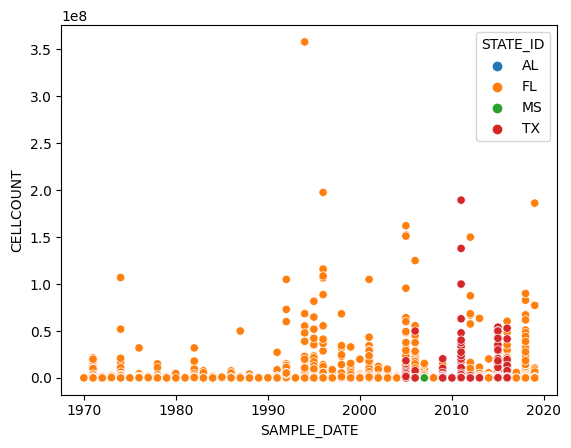

In [16]:
# Cell count VS state ID
year = alge_growth_clean['SAMPLE_DATE'].dt.year
sns.scatterplot(data=alge_growth_clean, x=year , y='CELLCOUNT', hue='STATE_ID')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


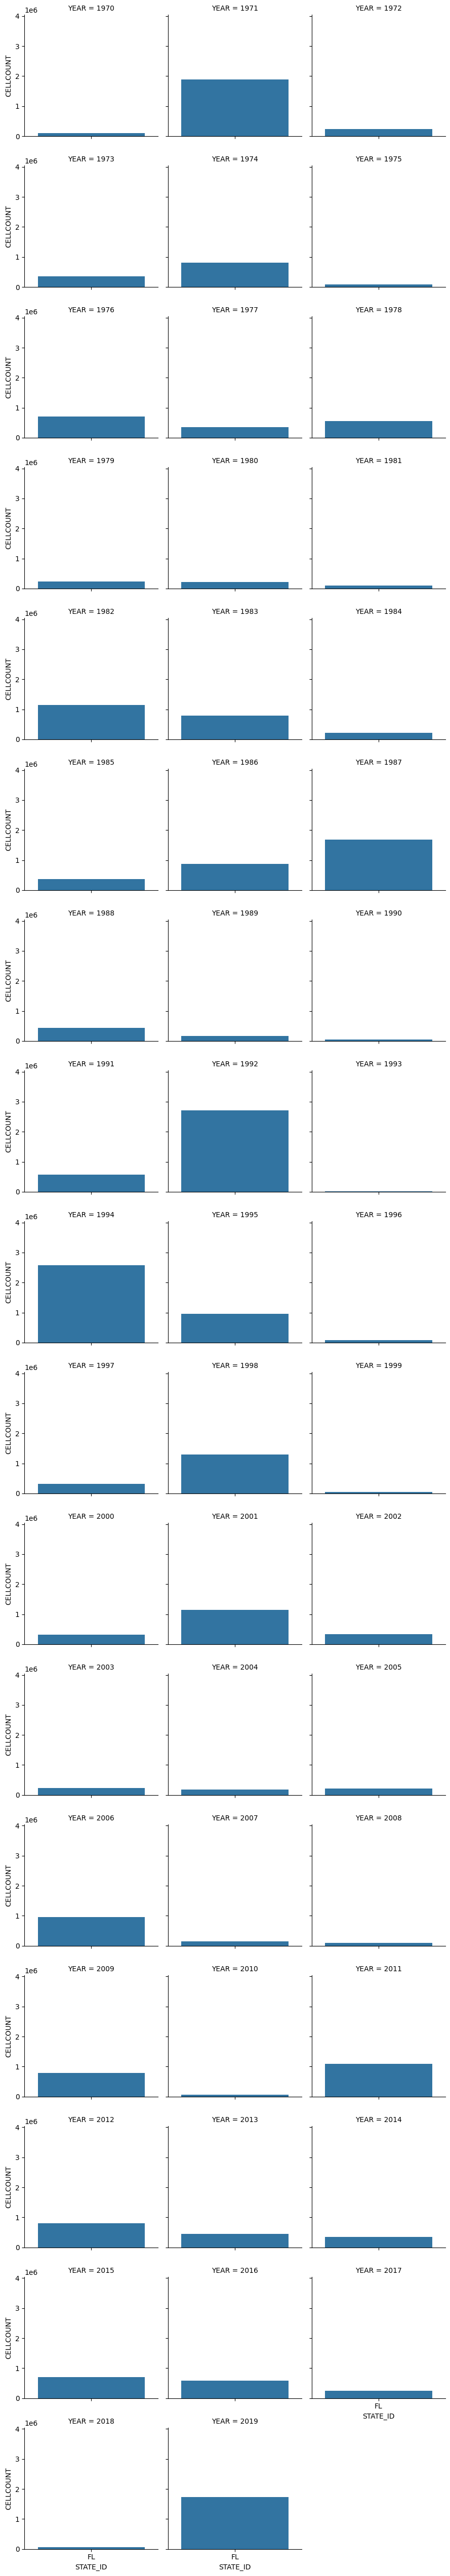

In [17]:
alge_growth_clean_y = alge_growth_clean
alge_growth_clean_y['YEAR'] = alge_growth_clean['SAMPLE_DATE'].dt.year

# group the data by year and calculate the mean of CELLCOUNT
grouped_data = alge_growth_clean_y.groupby(['YEAR', 'STATE_ID'], as_index=False)['CELLCOUNT'].mean()

# create a facet grid plot by year and state
g1 = sns.FacetGrid(grouped_data, col='YEAR', col_wrap=3)
g1.map(sns.barplot, 'STATE_ID', 'CELLCOUNT')

Text(0.5, 1.0, 'Average Cell Count by Year and State')

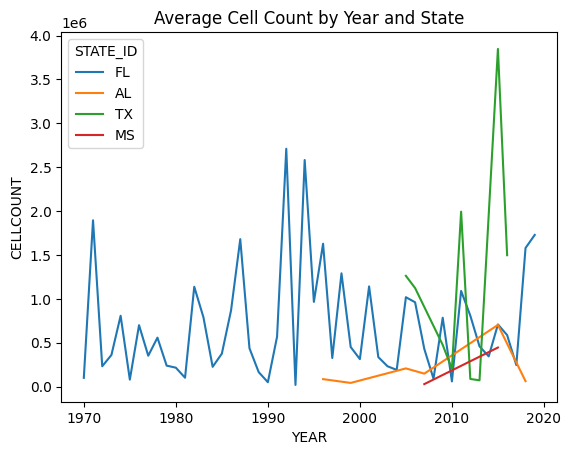

In [18]:
g2 = sns.lineplot(data=grouped_data, x='YEAR', y='CELLCOUNT', hue='STATE_ID')
g2.set_title('Average Cell Count by Year and State')